In [1]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Medical_Insurance.csv')

In [3]:

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

we have 1339 as rows and 7 columns

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

so we dont have any null values in the dataset

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

So we have total 3 data types in the dataset which are int64, float64 and object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


so here we can see that in age, bmi, children columns mean and median are almost equal 

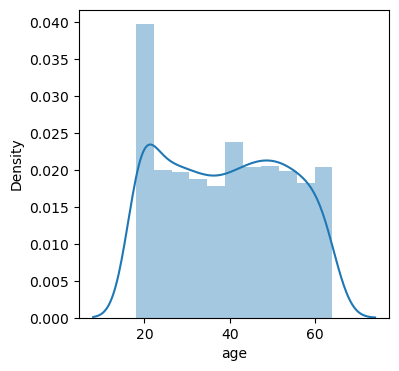

In [9]:
plt.figure(figsize=(4,4))
sns.distplot(df['age'])
plt.show()

by observing this distplot we can say that majority of people are from 20 to 25 and 40 to 60

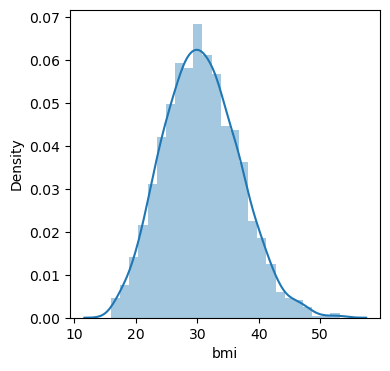

In [10]:
plt.figure(figsize=(4,4))
sns.distplot(df['bmi'])
plt.show()

so here we can see that for bmi distribution is normal 

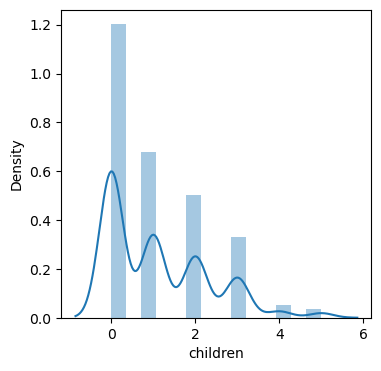

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
plt.figure(figsize=(4,4))
sns.distplot(df['children'])
plt.show()
df['children'].value_counts()

people are with 0 childrens are higher than 1,2,3,4,5

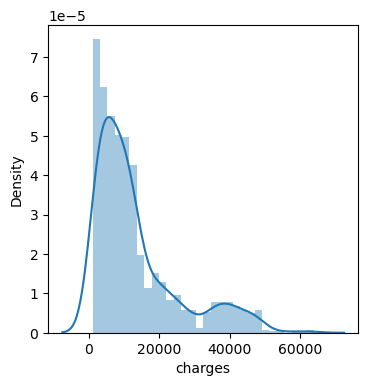

In [12]:
plt.figure(figsize=(4,4))
sns.distplot(df['charges'])
plt.show()

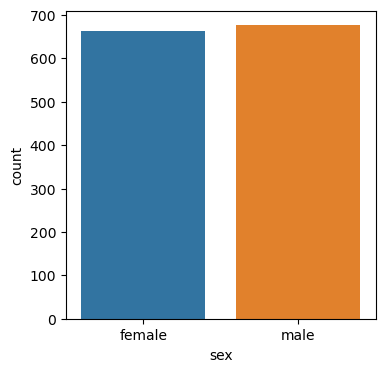

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['sex'])
plt.show()

as we can see in sex coulumn male and female are almost equal

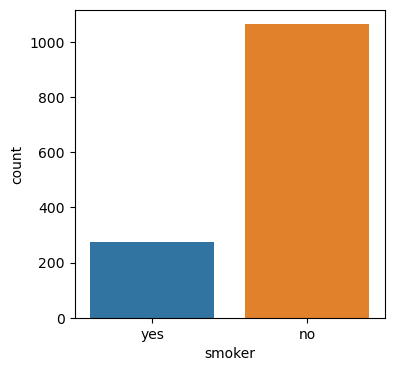

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['smoker'])
plt.show()

watching this countplot we can clearly say that people who are not smokers are higher than people who smoke

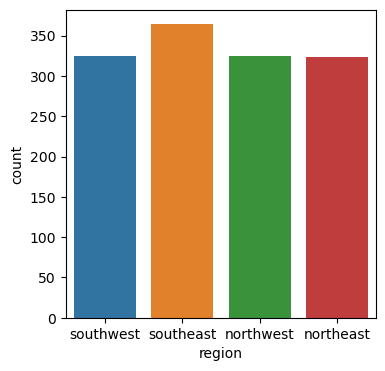

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['region'])
plt.show()

all region people are almost equal except Southeas region

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
LE= LabelEncoder()

list = ['sex','smoker','region']
for col in list:
    df[col]=LE.fit_transform(df[col].astype(str))

print('So we have converted all the categorical values to the numarical values')
df

So we have converted all the categorical values to the numarical values


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


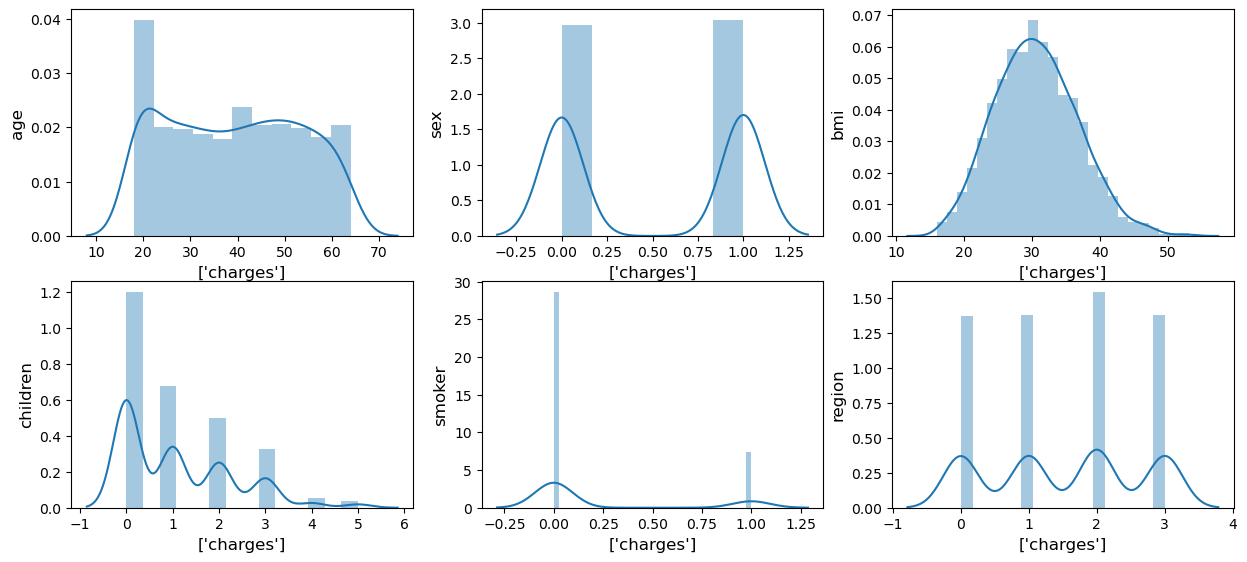

In [18]:
plt.figure(figsize=(15,10))
plot = 1
for col in df.columns:
    if plot<=6:
        plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(['charges'], fontsize = 12)
        plt.ylabel(col, fontsize = 12)
    plot+=1
plt.show()

In [19]:
features = df.iloc[:,0:-1]
target = df.iloc[:,-1]

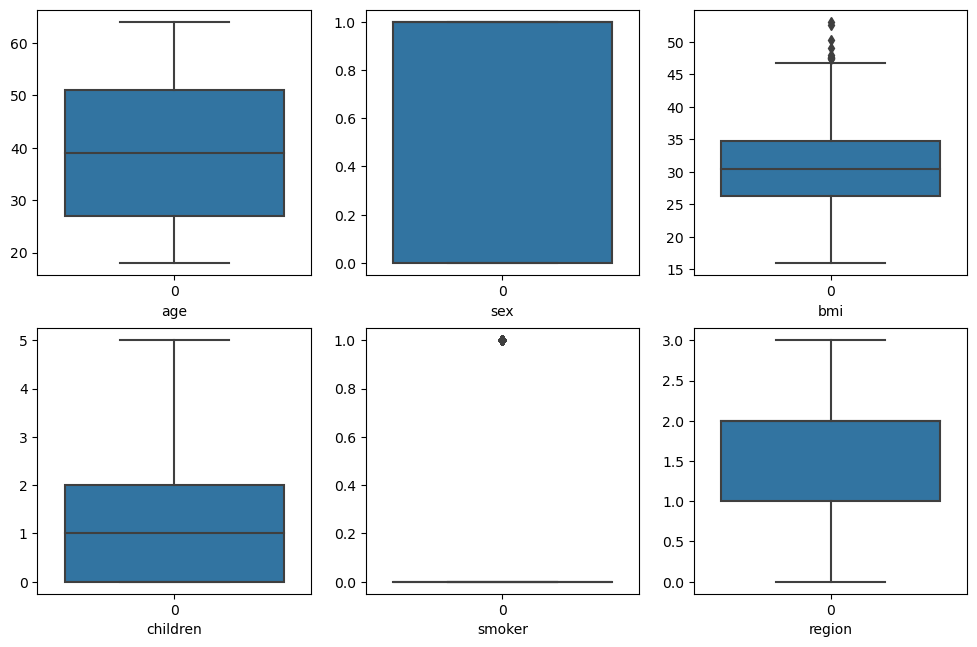

In [20]:
plt.figure(figsize=(12,20))
plot = 1
for col in features:
    if plot<=7:
        plt.subplot(5,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plot+=1
plt.show()

By observing boxplot we can understand that in coulumn sex and bmi outliers ar epresent

In [21]:
from scipy.stats import zscore

In [22]:
df1 = df[['bmi','smoker']]
z=np.abs(zscore(df1))
z

,bmi,smoker
0,0.453320,1.970587
1,0.509621,0.507463
2,0.383307,0.507463
3,1.305531,0.507463
4,0.292556,0.507463
...,...,...
1333,0.050297,0.507463
1334,0.206139,0.507463
1335,1.014878,0.507463
1336,0.797813,0.507463


In [23]:
np.where(z>3)

(array([ 116,  847, 1047, 1317], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [24]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(1334, 7)

So lets check Percentage of data we have lost after zscore method

In [25]:
print('Loss of Data in percentage',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Loss of Data in percentage 0.29895366218236175


In [26]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

there is skewness in smoker column but we can not remove skewness from categorical data and target 

In [27]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

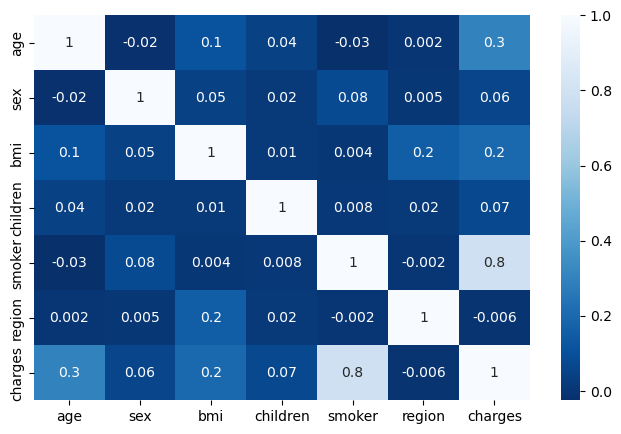

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),fmt='.1g',cmap='Blues_r', annot=True)

In [29]:
x = df.drop('charges',axis=1)
y = df['charges']

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


### Buildin Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=42)


lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(mean_squared_error(y_test,predlr))
print(mean_absolute_error(y_test,predlr))
print(r2_score(y_test,predlr))

33805466.898688614
4155.239843059381
0.7694415927057693


In [40]:
la = Lasso()
la.fit(x_train,y_train)
predla = la.predict(x_test)
print(mean_squared_error(y_test,predla))
print(mean_absolute_error(y_test,predla))
print(r2_score(y_test,predla))

33804869.21059549
4155.051839718793
0.7694456690291409


In [41]:
rg = Ridge()
rg.fit(x_train,y_train)
predrg = rg.predict(x_test)
print(mean_squared_error(y_test,predrg))
print(mean_absolute_error(y_test,predrg))
print(r2_score(y_test,predrg))

33808138.722259015
4156.4803090241885
0.769423370464118


In [54]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [44]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr = rfr.predict(x_test)
print(mean_squared_error(y_test,predrfr))
print(mean_absolute_error(y_test,predrfr))
print(r2_score(y_test,predrfr))

21459140.91514073
2545.853276069652
0.8536454069359641


In [55]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
predetr = etr.predict(x_test)
print(mean_squared_error(y_test,predetr))
print(mean_absolute_error(y_test,predetr))
print(r2_score(y_test,predetr))

23601710.582426555
2533.2022930912945
0.8390327571096275


In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtr = dtr.predict(x_test)
print(mean_squared_error(y_test,predtr))
print(mean_absolute_error(y_test,predtr))
print(r2_score(y_test,predtr))

39822348.32449658
2864.6297277338313
0.7284055495542299


In [52]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr = knr.predict(x_test)
print(mean_squared_error(y_test,predknr))
print(mean_absolute_error(y_test,predknr))
print(r2_score(y_test,predknr))

25091193.592689823
3093.263397624378
0.828874257256119


Lets check for Cross validation

In [56]:
from sklearn.model_selection import cross_val_score

In [70]:
score1 = cross_val_score(lr,x,y)
print(score1)
print(score1.mean())
print('difference in r2_score and cvs',r2_score(y_test,predlr)-score1.mean())

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
difference in r2_score and cvs 0.022189721671045493


In [71]:
score2 = cross_val_score(la,x,y)
print(score2)
print(score2.mean())
print('difference in r2_score and cvs',r2_score(y_test,predla)-score2.mean())

[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
difference in r2_score and cvs 0.022184734091711178


In [72]:
score3 = cross_val_score(rg,x,y)
print(score3)
print(score3.mean())
print('difference in r2_score and cvs',r2_score(y_test,predrg)-score3.mean())

[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582404
difference in r2_score and cvs 0.02216252030587762


In [73]:
score4 = cross_val_score(rfr,x,y)
print(score4)
print(score4.mean())
print('difference in r2_score and cvs',r2_score(y_test,predrfr)-score4.mean())

[0.85454891 0.7731801  0.8703709  0.8255888  0.8544446 ]
0.8356266604115892
difference in r2_score and cvs 0.018018746524374962


In [74]:
score5 = cross_val_score(etr,x,y)
print(score5)
print(score5.mean())
print('difference in r2_score and cvs',r2_score(y_test,predetr)-score5.mean())

[0.83338285 0.74703183 0.85020889 0.81106072 0.84134184]
0.8166052266017712
difference in r2_score and cvs 0.022427530507856397


In [75]:
score6 = cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference in r2_score and cvs',r2_score(y_test,predtr)-score6.mean())

[0.77070784 0.67768394 0.72796184 0.71805556 0.66743886]
0.7123696077986117
difference in r2_score and cvs 0.016035941755618177


In [76]:
score7 = cross_val_score(knr,x,y)
print(score7)
print(score7.mean())
print('difference in r2_score and cvs',r2_score(y_test,predknr)-score7.mean())

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
difference in r2_score and cvs 0.02264196138289032


So here we can see that RandomForestRegressor is giving us best R2 and csv score
So the DecisionTreeRegressor is our best performing model

In [78]:
from sklearn.model_selection import GridSearchCV

In [77]:
param = { "n_estimators" : [10,20,30], "max_features" : ["auto", "sqrt", "log2"], "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],}

In [83]:
estimator = RandomForestRegressor()
grid = GridSearchCV(estimator, param, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)
predgrid = grid.predict(x_test)
R2 = r2_score(y_test,predgrid)
print(R2*100)

86.23543829459693


In [84]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

In [85]:
import joblib

In [86]:
joblib.dump(grid,'Medical_Cost_Personal_Insurance_Project.pkl')

['Medical_Cost_Personal_Insurance_Project.pkl']

In [88]:
model = joblib.load('Medical_Cost_Personal_Insurance_Project.pkl')
model

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [89]:
pred_x = model.predict(x_test)
pred_x

array([ 9965.58634193,  5047.40160968, 27277.05836431, 10003.30829566,
       34731.19691791,  8071.17768442,  2264.47535223, 14278.71726053,
        6237.97806359, 10658.31876835, 19795.12856501,  7084.97313221,
        4798.85187345, 46270.32770283, 48370.86126079, 45222.24002642,
       11063.10829473, 43296.23678475, 10017.39501208, 25289.54976872,
        5894.71244039,  9138.4888284 ,  1772.83179693,  2957.95072437,
       12667.40826566, 12239.21335526, 13503.8861335 ,  6017.27458193,
       10281.45511909,  3318.30493425,  8600.80456698, 11733.47642693,
        2268.73881443,  5540.68763157,  3088.06278935, 13239.27375338,
        4153.15124896,  8236.18097518, 24344.49358102, 39759.59716214,
        7410.84222256,  3580.66047168, 12376.77411057, 13724.41373136,
        5991.48822767, 16947.38263912,  8858.00948131,  6109.59132488,
       42049.77430077,  6079.40599553, 14343.87045158,  3028.35022843,
        7188.86818494,  2083.54208721, 11527.57305052, 11368.81896551,
      

In [90]:
data = pd.DataFrame({'model predicted':pred_x,'original':y_test})

In [91]:
data

,model predicted,original
764,9965.586342,9095.06825
887,5047.401610,5272.17580
890,27277.058364,29330.98315
1293,10003.308296,9301.89355
259,34731.196918,33750.29180
...,...,...
701,14904.451197,9541.69555
672,6585.381998,4399.73100
1163,6624.558038,2200.83085
1103,12090.942794,11363.28320
